### Airbnb Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Airbnb_data.csv",index_col = "id")
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.shape

(48895, 15)

In [4]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [6]:
df.isna().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Data cleaning and preprocessing

In [7]:
df["name"].fillna("missing",inplace = True)
df["host_name"].fillna("missing",inplace = True)

In [8]:
df["last_review"].fillna(df["last_review"].value_counts()[0],inplace = True)

In [9]:
df["reviews_per_month"].fillna(df["reviews_per_month"].median(),inplace = True)

In [10]:
df.isna().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     48895 non-null  object 
 12  reviews_per_month         

In [12]:
#converted to date format
df["last_review"] = pd.to_datetime(df["last_review"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48895 non-null  object        
 1   host_id                         48895 non-null  int64         
 2   host_name                       48895 non-null  object        
 3   neighbourhood_group             48895 non-null  object        
 4   neighbourhood                   48895 non-null  object        
 5   latitude                        48895 non-null  float64       
 6   longitude                       48895 non-null  float64       
 7   room_type                       48895 non-null  object        
 8   price                           48895 non-null  int64         
 9   minimum_nights                  48895 non-null  int64         
 10  number_of_reviews               48895 non-null  int64         
 

In [14]:
df["last_review"].dt.year.unique()

array([2018, 2019, 1970, 2017, 2011, 2016, 2012, 2015, 2013, 2014],
      dtype=int64)

In [15]:
numeric_col = ["price","minimum_nights","reviews_per_month","calculated_host_listings_count","availability_365"]

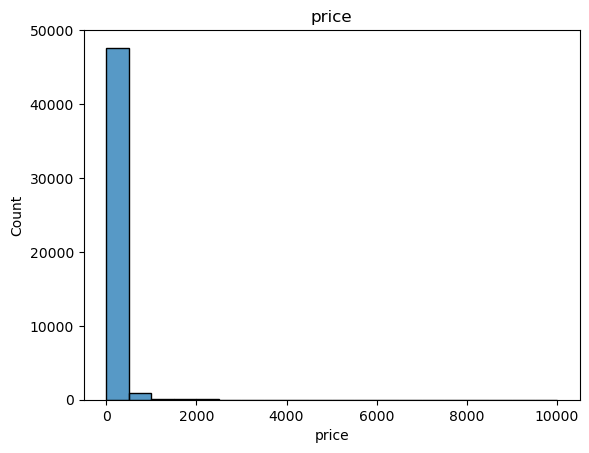

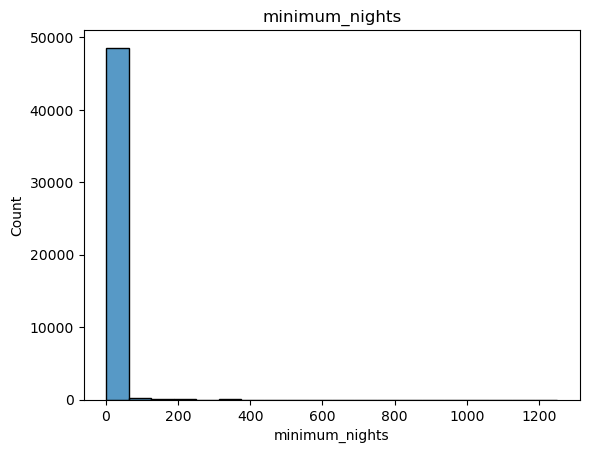

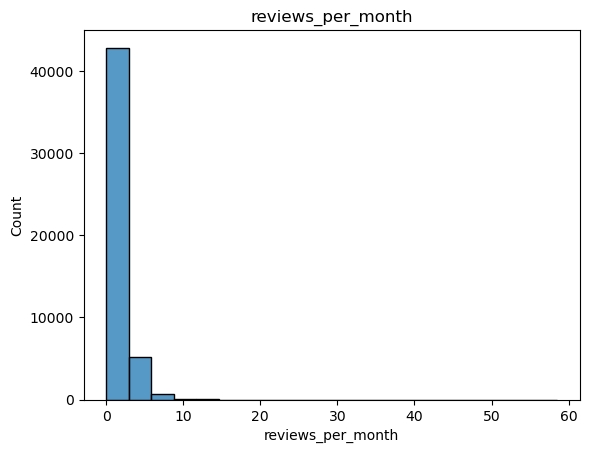

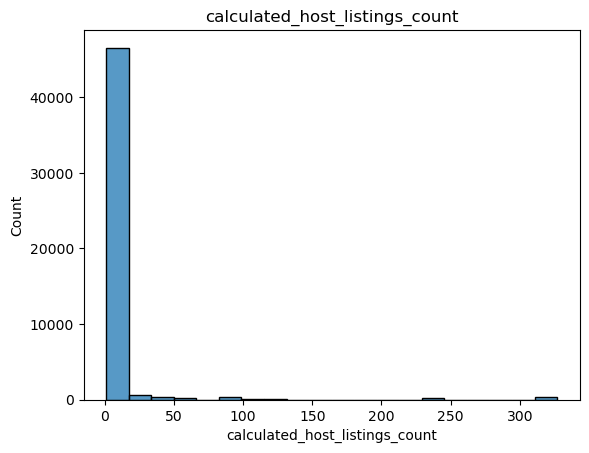

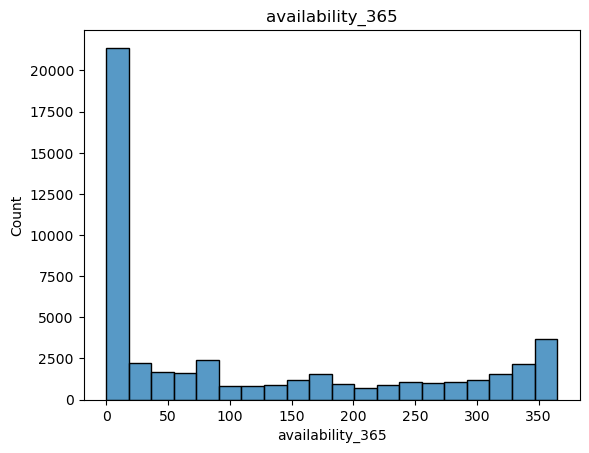

In [16]:
for i in numeric_col:
    sns.histplot(x = df[i],bins = 20)
    plt.title(i)
    plt.show()

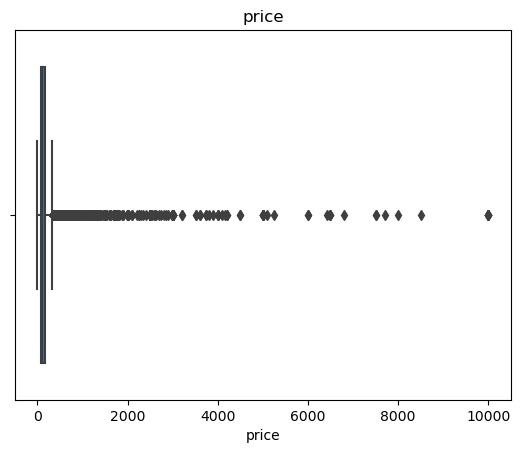

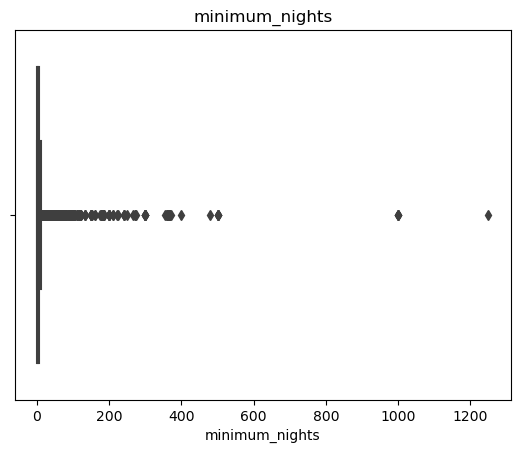

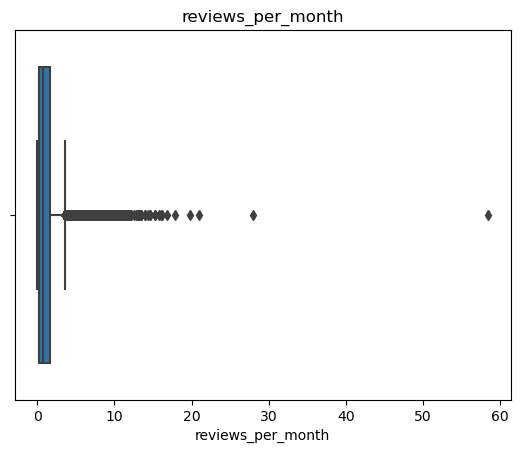

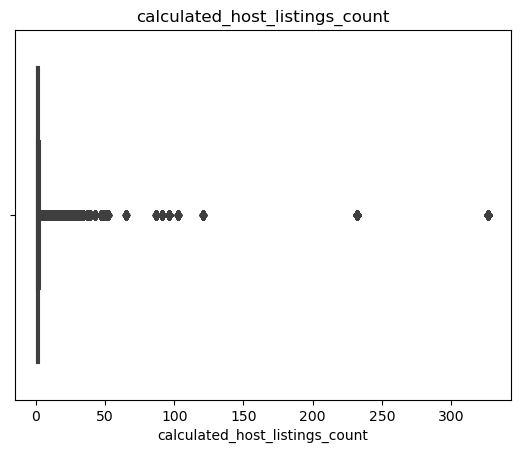

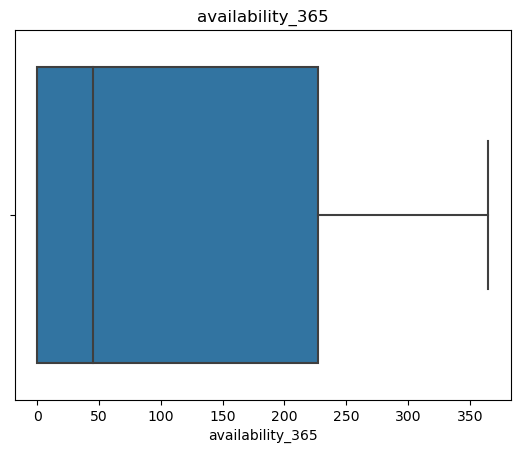

In [17]:
for i in numeric_col:
    sns.boxplot(x = df[i])
    plt.title(i)
    plt.show()

In [18]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00.000000000,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00.000000000,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1970-01-01 00:00:00.000001413,0.72,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00.000000000,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00.000000000,0.10,1,0


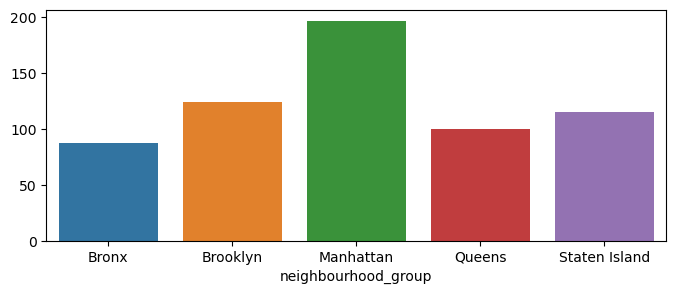

In [19]:
# average room price in different region
plt.figure(figsize = (8,3))
fig_x_y = df.groupby("neighbourhood_group")["price"].mean()
sns.barplot(x =fig_x_y.index, y = fig_x_y.values )
avg_price = df.groupby("neighbourhood_group")["price"].mean()

In [20]:
print("The average price of room in Bronx is",avg_price[0])
print("The average price of room in Brooklyn is",avg_price[1])
print("The average price of room in Manhattan is",avg_price[2])
print("The average price of room in Queens is",avg_price[3])
print("The average price of room in Staten Island is",avg_price[4])

The average price of room in Bronx is 87.4967919340055
The average price of room in Brooklyn is 124.38320732192598
The average price of room in Manhattan is 196.8758136743456
The average price of room in Queens is 99.51764913519237
The average price of room in Staten Island is 114.81233243967829


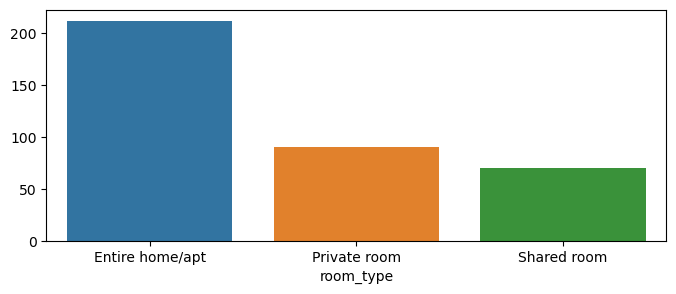

In [21]:
# average price of differnet rooms
plt.figure(figsize = (8,3))
fig_x_y = df.groupby("room_type")["price"].mean()
sns.barplot(x =fig_x_y.index, y = fig_x_y.values )
avg_room_price = df.groupby("room_type")["price"].mean()

In [22]:
print("The average room price of Entire home/apt is",avg_room_price[0])
print("The average room price of Private room  is",avg_room_price[1])
print("The average room price of Shared room is",avg_room_price[2])

The average room price of Entire home/apt is 211.79424613325986
The average room price of Private room  is 89.78097285675894
The average room price of Shared room is 70.12758620689655


In [23]:
pd.pivot_table(data = df,values = "price",index = "room_type",columns = "neighbourhood_group",aggfunc= "mean",margins = True)

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island,All
room_type,,,,,,
Entire home/apt,127.506596,178.327545,249.239109,147.050573,173.846591,211.794246
Private room,66.788344,76.500099,116.776622,71.762456,62.292553,89.780973
Shared room,59.800000,50.527845,88.977083,69.020202,57.444444,70.127586
All,87.496792,124.383207,196.875814,99.517649,114.812332,152.720687


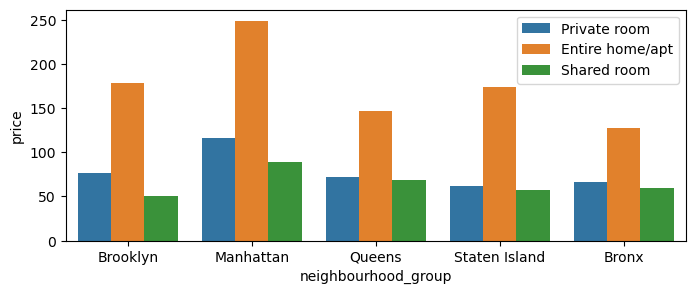

In [24]:
# average price of rooms in different regions
plt.figure(figsize = (8,3))
sns.barplot(data = df, x= "neighbourhood_group", y = "price", hue = "room_type", ci = None )
plt.legend(loc = 'best', bbox_to_anchor = (1, 1));

- Manhattan has highest average price for all types of room

<Axes: xlabel='room_type'>

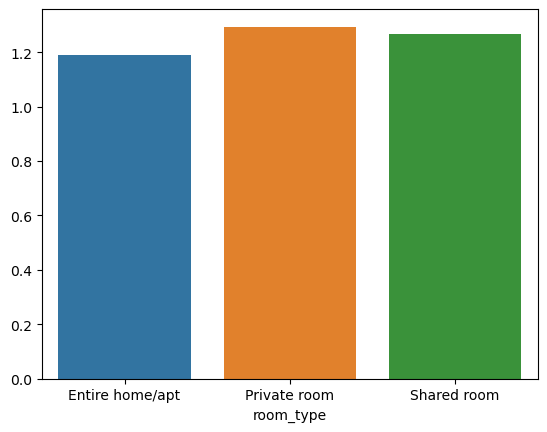

In [25]:
# reviews of different rooms
avg_review = df.groupby("room_type")["reviews_per_month"].mean()
sns.barplot(data = df, x = avg_review.index, y = avg_review.values)

From the barplot we can say that private room has highest review per month followed by shared room and entire room

Manhattan        44.30
Brooklyn         41.12
Queens           11.59
Bronx             2.23
Staten Island     0.76
Name: neighbourhood_group, dtype: float64


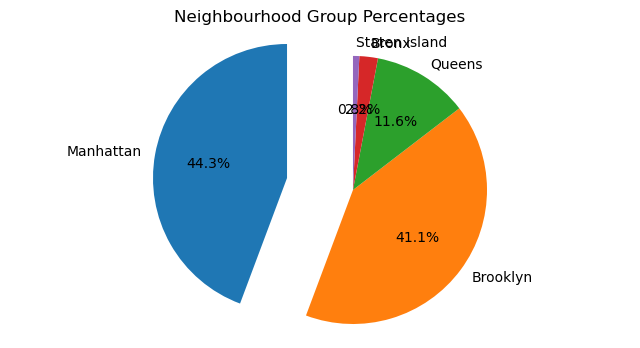

In [26]:
#percentage of properties by region

percentages = np.round(df["neighbourhood_group"].value_counts(normalize= True)*100,2)
print(percentages)
plt.figure(figsize=(8, 4))
explode = (0.5, 0, 0, 0,0)  
plt.pie(percentages,labels = percentages.index,autopct="%1.1f%%",startangle=90,explode = explode)
plt.title('Neighbourhood Group Percentages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Entire home/apt    51.97
Private room       45.66
Shared room         2.37
Name: room_type, dtype: float64


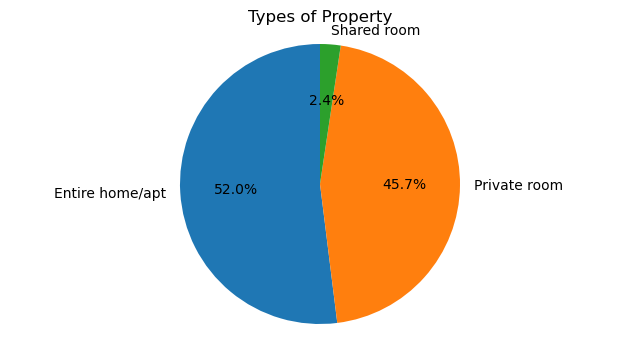

In [27]:
# percentages of different types of rooms
plt.figure(figsize = (8,4))
percentages = np.round(df["room_type"].value_counts(normalize = True)*100,2)
print(percentages)
plt.pie(percentages,labels = percentages.index,autopct="%1.1f%%",startangle=90)
plt.title('Types of Property')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Majorly types of properties are home/apt and private rooms

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: host_id, dtype: int64


<Axes: xlabel='neighbourhood_group'>

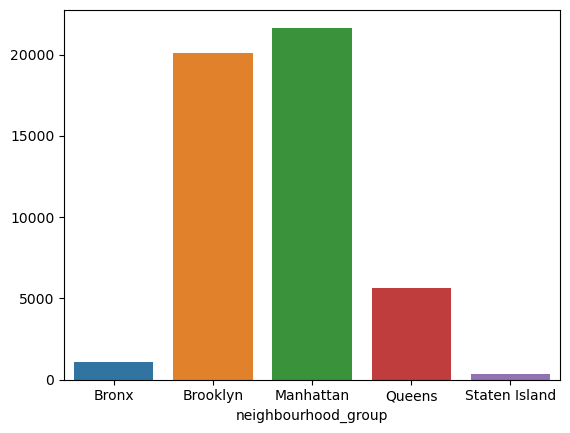

In [28]:
# numbers of host in different regions
count_of_host = df.groupby("neighbourhood_group")["host_id"].count()
print(count_of_host)
sns.barplot(data = df, x= count_of_host.index,y = count_of_host.values)

Manhattan has the highest number of property owners followed by brookyln

<Axes: >

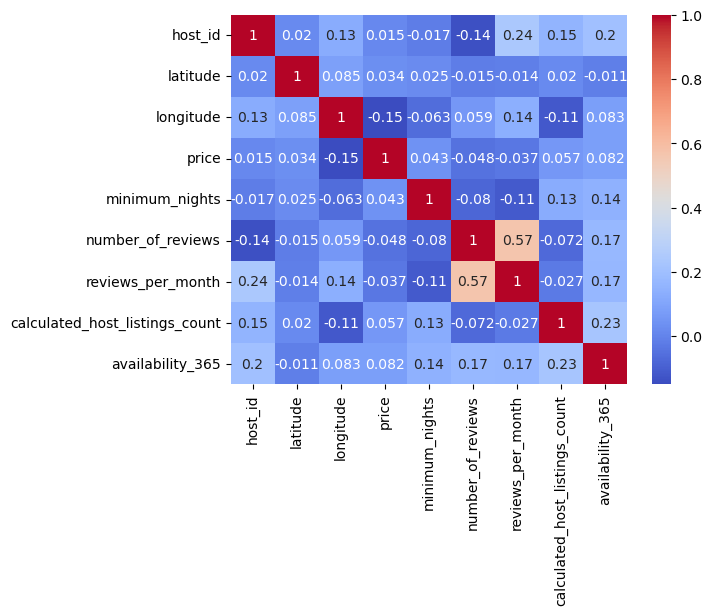

In [42]:
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

<Axes: xlabel='price', ylabel='Count'>

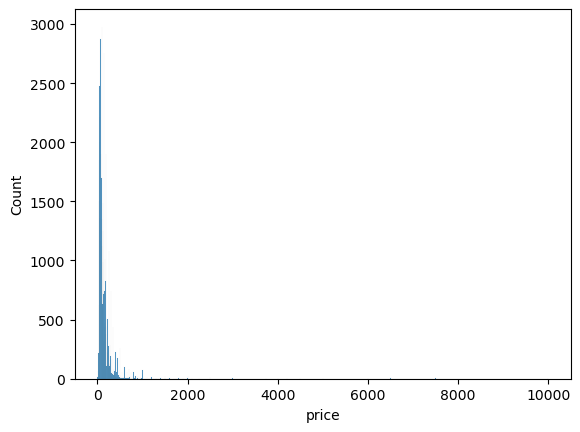

In [30]:
# checking distribution of price
sns.histplot(data = df,x = "price")

<Axes: xlabel='price', ylabel='Count'>

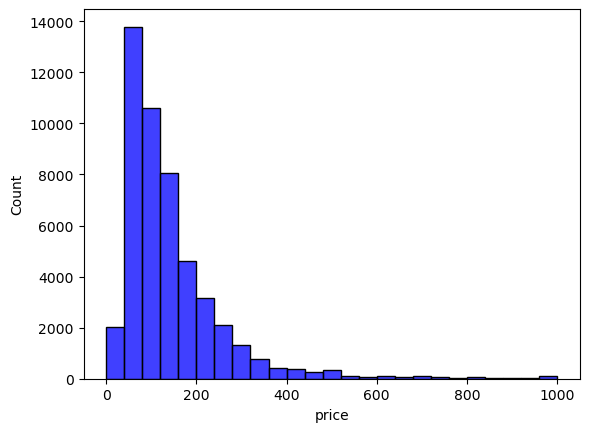

In [31]:
sns.histplot(df[df["price"]<=1000],x = "price",bins = "doane",kde = False,color = "blue")

majority of prices are in the lower range, with a few having very high prices.

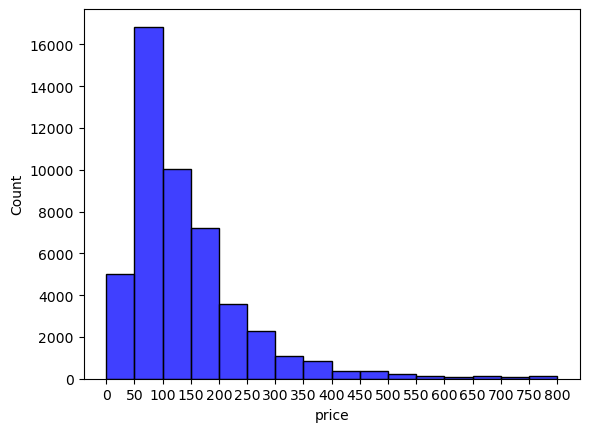

In [32]:
sns.histplot(df[df['price'] <= 800], x='price', binwidth=50, kde=False, color='blue')
plt.xticks(np.arange(0, 801, 50))
plt.show()

Majority of the prices are in lower range that is 50 - 100 $

In [33]:
# Statistics of Reviews
reviews = df.loc[: , 'number_of_reviews']

max_reviews = np.max(reviews)
print('The maximum number of reviews for a single property is:', max_reviews)
min_reviews = np.min(reviews)
print('The minimum number of reviews for a single property is:', min_reviews)
average_reviews = np.mean(reviews)
print('The average number of reviews for a single property is:', int(average_reviews))

The maximum number of reviews for a single property is: 629
The minimum number of reviews for a single property is: 0
The average number of reviews for a single property is: 23


<Axes: xlabel='number_of_reviews', ylabel='Count'>

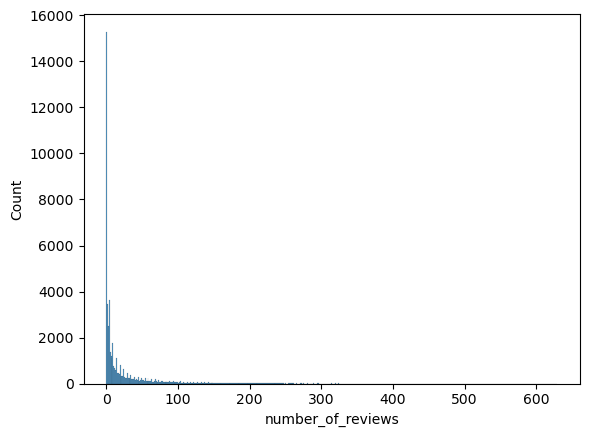

In [34]:
# distributions of review
sns.histplot(data = df, x = "number_of_reviews")

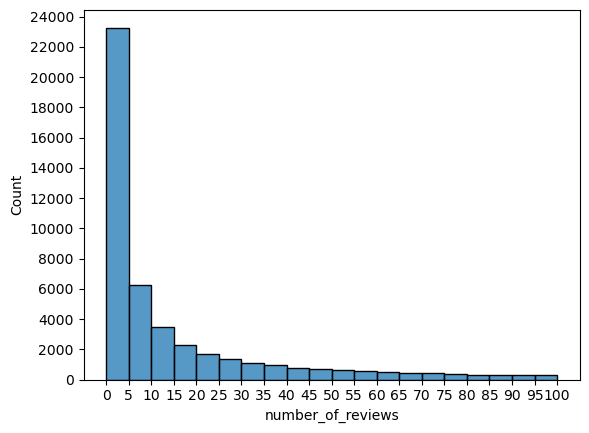

In [35]:
sns.histplot(data = df[df["number_of_reviews"]<=100], x = "number_of_reviews",binwidth = 5, kde = False)
plt.xticks(np.arange(0,101,5))
plt.yticks(np.arange(0,25001,2000))
plt.show()

0-20 has the highest numbers of reviews

In [36]:
# stastistic for mininmum nights
minimum_nights = df.loc[:, 'minimum_nights']

max_minimum_nights = np.max(minimum_nights)
print('The maximum number of minimum nights for a single property is:', int(max_minimum_nights))
min_minimum_nights = np.min(minimum_nights)
print('The minimum number of minimum nights for a single property is:', int(min_minimum_nights))
average_minimum_nights  = np.mean(minimum_nights)
print('The average number of minimum nights for a single property is:', int(average_minimum_nights))

The maximum number of minimum nights for a single property is: 1250
The minimum number of minimum nights for a single property is: 1
The average number of minimum nights for a single property is: 7


<Axes: xlabel='minimum_nights', ylabel='Count'>

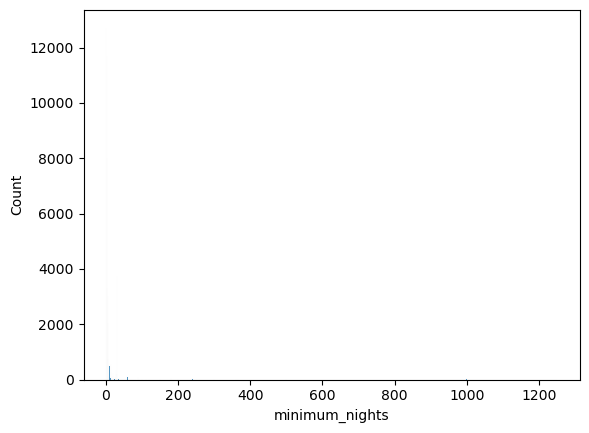

In [37]:
# distributions of minimun nights
sns.histplot(data = df,x="minimum_nights")

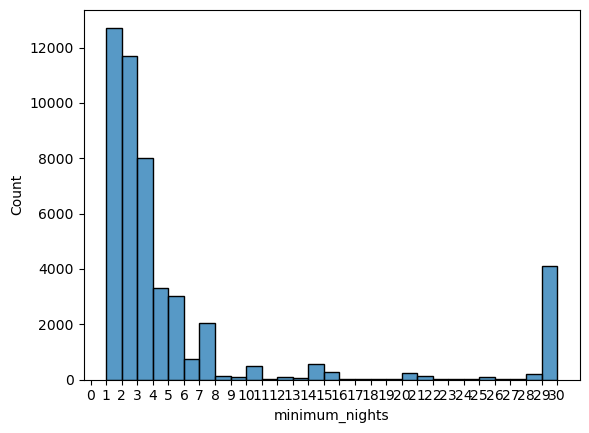

In [38]:
sns.histplot(data = df[df["minimum_nights"]<=30],x="minimum_nights",binwidth = 1,kde = False)
plt.xticks(np.arange(0,31,1))
plt.show()

Majority properties provide to stay for 1- 6 days and quite of them provide like to for a month 

In [39]:
#statistics for hot listing count
properties_hosts = df.loc[:, 'calculated_host_listings_count']

max_properties_hosts = np.max(properties_hosts)
print('The maximum number of properties per host is:', int(max_properties_hosts))

min_properties_hosts = np.min(properties_hosts)
print('The minimum number of properties per host is:', int(min_properties_hosts))

average_properties_hosts = np.mean(properties_hosts)
print('The average number of properties per host is:', int(average_properties_hosts))


The maximum number of properties per host is: 327
The minimum number of properties per host is: 1
The average number of properties per host is: 7


<Axes: xlabel='calculated_host_listings_count', ylabel='Count'>

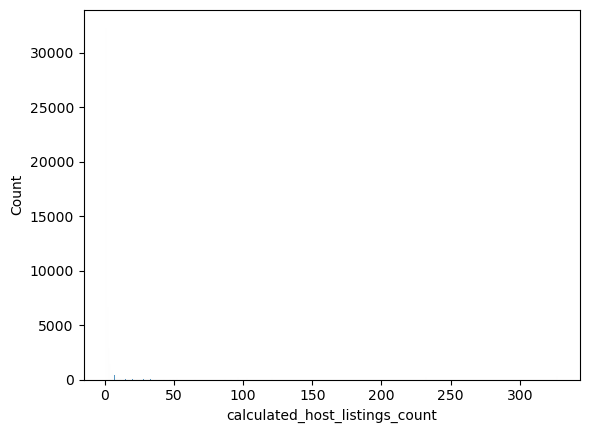

In [40]:
# distribution of host listing count
sns.histplot(data = df, x = "calculated_host_listings_count")

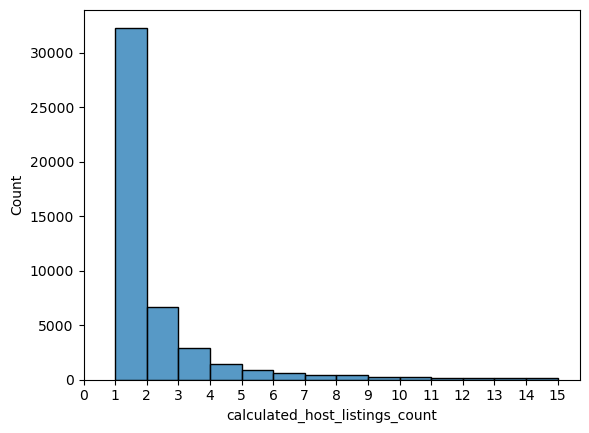

In [41]:
sns.histplot(data = df[df["calculated_host_listings_count"]<= 15], x= "calculated_host_listings_count",binwidth = 1,kde = False)
plt.xticks(np.arange(0,16,1))
plt.show()

Majorly most of the host had 1 property